In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import h5py
import Sim_functions2 as sim

paraview version 5.0.1


<IPython.core.display.Javascript object>


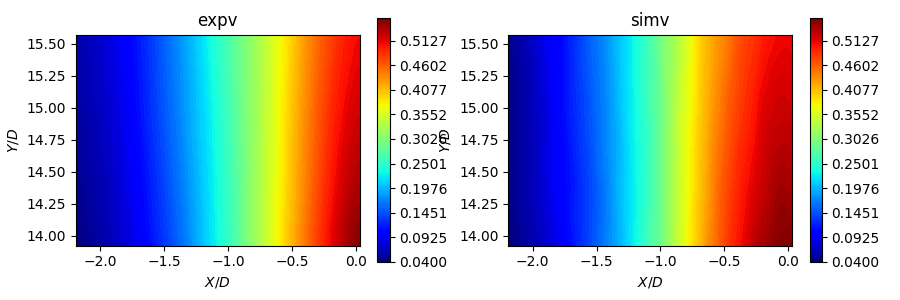

<IPython.core.display.Javascript object>


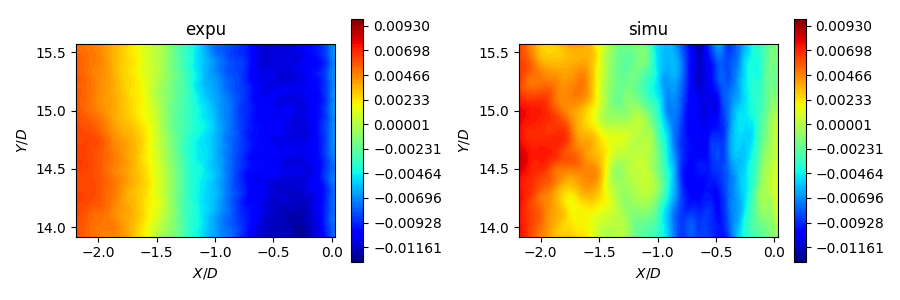

In [7]:
# exp data
expv=np.load('../DA_ExperimentalData/From_JFrank_5000_cold_SandiaC/Ave_rms/ave_v.npy')
expu=np.load('../DA_ExperimentalData/From_JFrank_5000_cold_SandiaC/Ave_rms/ave_u.npy')
# read in X and Y
f = h5py.File('../DA_ExperimentalData/From_JFrank_5000_cold_SandiaC/T093013_01_Velocity_1-500.mat')
expX = np.array(f['X'][0,:])
expY = np.array(f['Y'][0,:])
D_ref=0.00745
U_ref=27.5
expY=expY/(1000.)+15.*D_ref # mm to m and 15 diam. downstream
expX=expX/1000.-(1.15*D_ref) # centered between nozzles
# non-dimensionalize everything
expX = expX/D_ref
expY = expY/D_ref
expv = expv/U_ref
expu = expu/U_ref
# make mesh grid for plotting
expX,expY=np.meshgrid(expX,expY,indexing='ij')

# simulation data
calc_optionsu={
        'direction':'u',
        #'sim_dir':'../Create_Plots/for_S_AVG_vs_EXP/',
        'sim_dir':'../Create_Plots/From_Jeff_new_BC/',
        'manufactured':False,
        'method':0,
        'option':2,             # order of taylor derivative difference scheme (option 2 means second order accurate), or option for manufactured solution type
        'xi':1000,                 # if box_probe [0-19] elif vtu [0-126]
        'yi':9999,                 # if box_probe [0-10] elif vtu [0-169]
        'read_from':'vtu',      # ['box_probe','vtu']
        #'read_from':'box_probe' # ['box_probe','vtu']
        'sim_var':'U_AVG',
        #'sim_var':'U_RMS',
        'X_interp_pts':126j,
        'Y_interp_pts':169j,
        'Z_interp_pts':1j,
        }
calc_optionsv={
        'direction':'v',
        #'sim_dir':'../Create_Plots/for_S_AVG_vs_EXP/',
        'sim_dir':'../Create_Plots/From_Jeff_new_BC/Data/',
        'manufactured':False,
        'method':0,
        'option':2,             # order of taylor derivative difference scheme (option 2 means second order accurate), or option for manufactured solution type
        'xi':1000,                 # if box_probe [0-19] elif vtu [0-126]
        'yi':9999,                 # if box_probe [0-10] elif vtu [0-169]
        'read_from':'vtu',      # ['box_probe','vtu']
        'sim_var':'U_AVG',
        #'sim_var':'U_RMS',
        'X_interp_pts':126j,
        'Y_interp_pts':169j,
        'Z_interp_pts':1j,
        }

# initialize
simu = sim.sim(calc_optionsu)
simv = sim.sim(calc_optionsv)

# uncomment for saving npy files
#simu.slice_orient_save_vtu_to_csv()
#simu.read_csv_files()
#simv.read_csv_files()
#print 'interpolating'
#simu.interpolate_csv_data()
#simv.interpolate_csv_data()
#print 'saving'
#simu.save_all_data_npy()
#simv.save_all_data_npy()

# load all data from npy files
simu.load_all_data_npy()
simv.load_all_data_npy()

# output a few values to check
#print np.abs(sim1.Yall[::-1,:,0].T - expX)
#print np.abs(sim1.Xall[::-1,:,0].T - expY)
#print np.abs(sim1.Uall[0,::-1,:,0].T - exp)

# creat plots

# for axial
fig=plt.figure()
ax=plt.subplot(121)
fig.set_size_inches(9.,3)
# exp data
colors=np.linspace(0.04,0.56,100) # axial avg
#colors=np.linspace(0.023,0.11,100) # axial RMS
plt.colorbar(ax.contourf(expX,expY,expv,colors,cmap='jet'))
ax.set_title('expv')
ax.axis('scaled')
ax.set_xlabel(r'$X/D$')
ax.set_ylabel(r'$Y/D$')
# sim data
ax=plt.subplot(122)
plt.colorbar(ax.contourf(simu.Yall[:,:,0].T,simu.Xall[:,:,0].T,simu.Uall[0,:,:,0].T,colors,cmap='jet'))
ax.set_title('simv')
ax.axis('scaled')
plt.tight_layout()
ax.set_xlabel(r'$X/D$')
ax.set_ylabel(r'$Y/D$')

# for radial
fig=plt.figure()
ax=plt.subplot(121)
fig.set_size_inches(9.,3)
# exp data
colors=np.linspace(-0.013,0.010,100) # radial avg
#colors=np.linspace(0.023,0.11,100) # axial RMS
plt.colorbar(ax.contourf(expX,expY,expu,colors,cmap='jet'))
ax.set_title('expu')
ax.axis('scaled')
ax.set_xlabel(r'$X/D$')
ax.set_ylabel(r'$Y/D$')
# sim data
ax=plt.subplot(122)
plt.colorbar(ax.contourf(simv.Yall[:,:,0].T,simv.Xall[:,:,0].T,simv.Uall[0,:,:,0].T,colors,cmap='jet'))
ax.set_title('simu')
ax.axis('scaled')
ax.set_xlabel(r'$X/D$')
ax.set_ylabel(r'$Y/D$')
plt.tight_layout()

plt.show()